**1. Importing the dependencies**


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


**2. Data collection and preprocessing**

In [4]:
churn_data = pd.read_csv("C:\Practices\Projects\Customer Churn Prediction\dataset\churndata.csv")

In [5]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
churn_data.shape

(7043, 21)

In [11]:
x = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

In [12]:
churn_data.drop(columns= x, inplace= True)

In [13]:
churn_data.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,No,Month-to-month,29.85,29.85,No
1,34,Yes,No,One year,56.95,1889.5,No
2,2,Yes,No,Month-to-month,53.85,108.15,Yes
3,45,Yes,Yes,One year,42.30,1840.75,No
4,2,No,No,Month-to-month,70.70,151.65,Yes


In [14]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   OnlineSecurity  7043 non-null   object 
 2   TechSupport     7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   object 
 6   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


In [15]:
churn_data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [16]:
churn_data.isnull().sum()

tenure            0
OnlineSecurity    0
TechSupport       0
Contract          0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [17]:
churn_data.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,No,No,Month-to-month,29.85,29.85,No
1,34,Yes,No,One year,56.95,1889.5,No
2,2,Yes,No,Month-to-month,53.85,108.15,Yes
3,45,Yes,Yes,One year,42.30,1840.75,No
4,2,No,No,Month-to-month,70.70,151.65,Yes


In [18]:
churn_data.columns

Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
# Printing unique values in all the columns
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in churn_data.columns:
    if col not in numerical_col:
        print(f"{col} : ",churn_data[col].unique())
        print("-"*50)

OnlineSecurity :  ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport :  ['No' 'Yes' 'No internet service']
--------------------------------------------------
Contract :  ['Month-to-month' 'One year' 'Two year']
--------------------------------------------------
Churn :  ['No' 'Yes']
--------------------------------------------------


In [22]:
churn_data['OnlineSecurity'].replace({'No internet service': 'No'}, inplace= True)
churn_data['TechSupport'].replace({'No internet service': 'No'}, inplace= True)
churn_data['Contract'].replace({'Month-to-month': 'Months'}, inplace= True)

In [23]:
for col in churn_data.columns:
    if col not in numerical_col:
        print(f"{col} : ",churn_data[col].unique())
        print("-"*50)


OnlineSecurity :  ['No' 'Yes']
--------------------------------------------------
TechSupport :  ['No' 'Yes']
--------------------------------------------------
Contract :  ['Months' 'One year' 'Two year']
--------------------------------------------------
Churn :  ['No' 'Yes']
--------------------------------------------------


In [24]:
churn_data[churn_data['TotalCharges'] == " "]

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
488,0,Yes,Yes,Two year,52.55,,No
753,0,No,No,Two year,20.25,,No
936,0,Yes,No,Two year,80.85,,No
1082,0,No,No,Two year,25.75,,No
1340,0,Yes,Yes,Two year,56.05,,No
3331,0,No,No,Two year,19.85,,No
3826,0,No,No,Two year,25.35,,No
4380,0,No,No,Two year,20.00,,No
5218,0,No,No,One year,19.70,,No
6670,0,No,Yes,Two year,73.35,,No


In [25]:
len(churn_data[churn_data['TotalCharges'] == ' '])

11

In [53]:
churn_data['TotalCharges'].replace({" " : '0.0'}, inplace= True)
churn_data['Churn'].replace({'No' : 0, 'Yes' : 1}, inplace= True)

In [54]:
churn_data['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [55]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

In [56]:
# checking the class distribution of target column
churn_data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

**Insights**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharge column were replaced with 0
4. Class imbalance identified in the target column

**3. EDA**

In [57]:
churn_data.columns

Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
churn_data.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,29.85,29.85,0
1,34,1,0,1,56.95,1889.50,0
2,2,1,0,0,53.85,108.15,1
3,45,1,1,1,42.30,1840.75,0
4,2,0,0,0,70.70,151.65,1


In [59]:
# Works only on numerical datatype
churn_data.describe()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.286668,0.290217,0.690473,64.761692,2279.734304,0.265370
std,24.559481,0.452237,0.453895,0.833755,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,70.350000,1394.550000,0.000000
75%,55.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,72.000000,1.000000,1.000000,2.000000,118.750000,8684.800000,1.000000


Numerical features - analysis

Understand the distribution of the Numerical features

In [60]:
def plot_hist(churn_data, column_name):
    plt.figure(figsize= (5, 3))
    sns.histplot(churn_data[column_name], kde= True)
    plt.title(f"Histplot of {column_name}")
    
    # Calculating mean and median used for the column
    col_mean = churn_data[column_name].mean()
    col_median = churn_data[column_name].median()
    
    # Adding verticle line for mean and median
    plt.axvline(col_mean, color= 'red', linestyle= '--', label= "Mean", linewidth= 1)
    plt.axvline(col_median, color= 'green', linestyle= '-', label= "Median", linewidth= 1)

    plt.legend()

    plt.show()

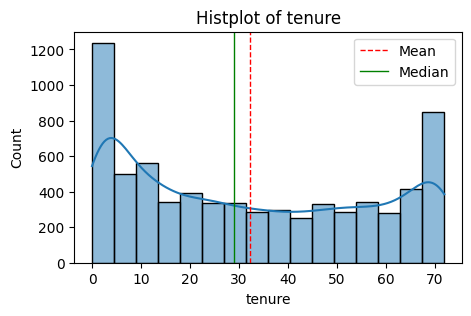

In [61]:
plot_hist(churn_data, "tenure")

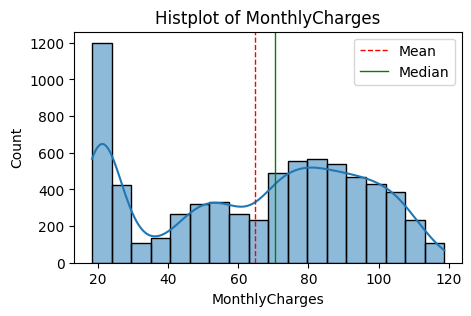

In [62]:
plot_hist(churn_data, "MonthlyCharges")

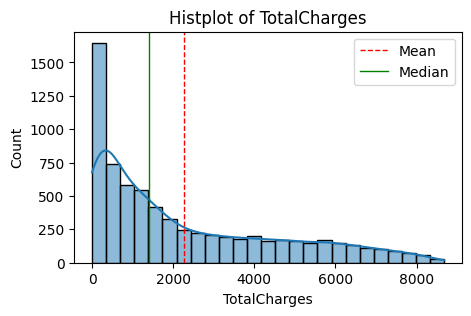

In [63]:
plot_hist(churn_data, 'TotalCharges')

In [64]:
# Boxplot for numerical column
def box_plot(churn_data, column_name):
    plt.figure(figsize= (5, 3))
    sns.boxplot(churn_data[column_name])
    plt.title(f"Box plot for {column_name}")
    plt.show()

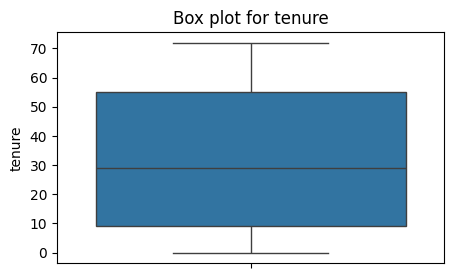

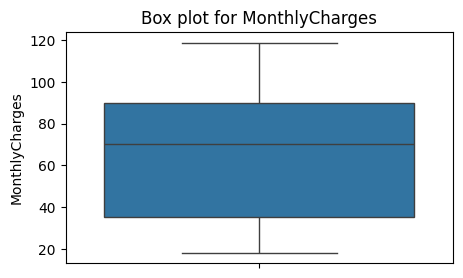

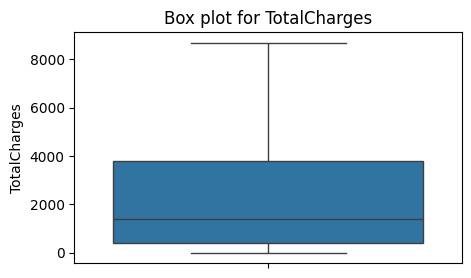

In [65]:
for i in numerical_col:
    box_plot(churn_data, i)


There are no outlier

**Converting categorical to numerical**

tenure	OnlineSecurity	TechSupport	Contract	MonthlyCharges	TotalCharges	Churn

In [69]:
categorical_to_numerical = ['OnlineSecurity', 'TechSupport', 'Contract']

In [70]:
label_encoder = LabelEncoder()

In [71]:
encoders = {}

for col in churn_data:
    if col in categorical_to_numerical:
        churn_data[col] = label_encoder.fit(churn_data[col]).transform(churn_data[col])
        encoders[col] = label_encoder

# Save the encoder to a pickle file
with open("encoder.pkl", 'wb') as f:
    pickle.dump(encoders, f)

In [72]:
encoders

{'OnlineSecurity': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'Contract': LabelEncoder()}

**Correlation heatmap for numerical columns**

<Axes: >

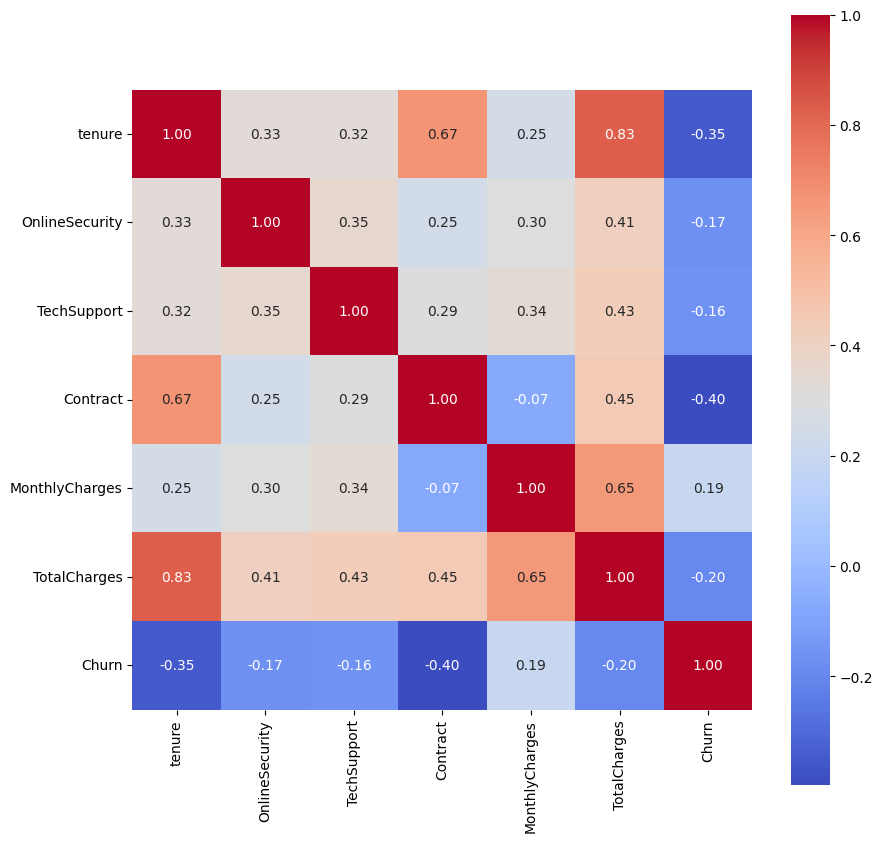

In [73]:
# correlation matrix - heatmap
plt.figure(figsize= (10, 10))
sns.heatmap(churn_data.corr(), cbar= True, annot= True, square= True, fmt= '.2f', cmap= 'coolwarm')

<Axes: >

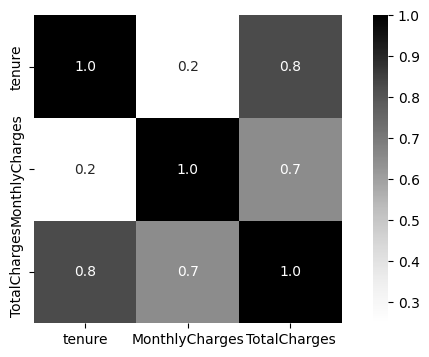

In [74]:
plt.figure(figsize= (8, 4))
sns.heatmap(churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot= True, square= True, cbar= True, fmt= '.1f', cmap= 'Grays')

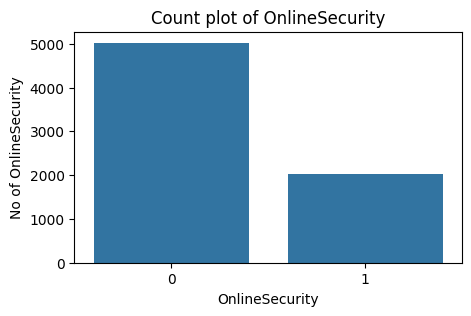

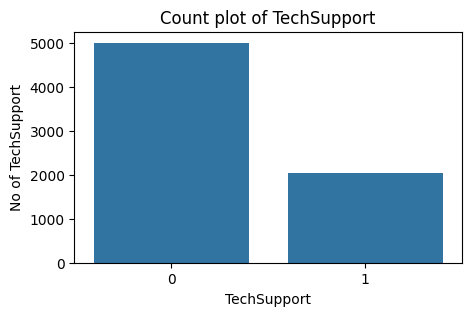

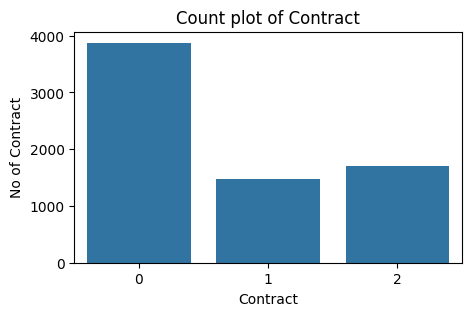

In [75]:
for col in categorical_to_numerical:
    plt.figure(figsize= (5, 3))
    sns.countplot(x= churn_data[col])
    plt.title(f"Count plot of {col}")
    plt.ylabel(col)
    plt.ylabel(f"No of {col}")
    plt.show()

In [76]:
churn_data.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,29.85,29.85,0
1,34,1,0,1,56.95,1889.50,0
2,2,1,0,0,53.85,108.15,1
3,45,1,1,1,42.30,1840.75,0
4,2,0,0,0,70.70,151.65,1


**Splitting the data into features and target**

In [77]:
X = churn_data.drop(columns= ['Churn'], axis= 1)
Y = churn_data['Churn']

**Train test split**

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [79]:
print(X_train.shape, X_test.shape)

(5634, 6) (1409, 6)


In [80]:
Y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

**Performing SMOTE (Synthetic Minority Oversampling technique)**

In [81]:
smote = SMOTE(random_state= 42)

Oversampling can only be done on training data

In [82]:
# Class imbalance (Oversampling)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train) 

In [83]:
print(Y_train_smote.shape)

(8276,)


In [84]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model training**

Training with default hyperparameter tuning

In [85]:
# from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


models = {'xgb' : XGBClassifier(random_state=42),
'dtc' : DecisionTreeClassifier(random_state=42),
'rf' : RandomForestClassifier(random_state=42)}

In [86]:
# dictionary to store the cross validation results
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv= 5, scoring= 'accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy:{np.mean(scores) * 100: .2f} %")
    print('-'*50)

Training xgb with default parameters
xgb Cross-Validation Accuracy: 81.32 %
--------------------------------------------------
Training dtc with default parameters
dtc Cross-Validation Accuracy: 76.86 %
--------------------------------------------------
Training rf with default parameters
rf Cross-Validation Accuracy: 81.47 %
--------------------------------------------------


In [87]:
cv_scores

{'xgb': array([0.75241546, 0.76676737, 0.85679758, 0.84229607, 0.84773414]),
 'dtc': array([0.71980676, 0.74018127, 0.77824773, 0.79637462, 0.80845921]),
 'rf': array([0.75301932, 0.77220544, 0.84833837, 0.85377644, 0.84592145])}

**Model Selection and Hyperparameter tuning**

In [88]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [89]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=models['dtc'], param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rfc = RandomizedSearchCV(estimator=models['rf'], param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=models['xgb'], param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [90]:
random_search_dt.fit(X_train_smote,Y_train_smote)
random_search_rfc.fit(X_train_smote,Y_train_smote)
random_search_xgb.fit(X_train_smote,Y_train_smote)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.5, 0.7, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [99]:
best_score = 0
best_model = None

rs_dt_estimator = random_search_dt.best_estimator_
rs_dt_score = random_search_dt.best_score_

if best_score < rs_dt_score:
    best_model = rs_dt_estimator
    best_score = rs_dt_score

rs_rfc_estimator = random_search_rfc.best_estimator_
rs_rfc_score = random_search_rfc.best_score_

if best_score < rs_rfc_score:
    best_model = rs_rfc_estimator
    best_score = rs_rfc_score

xgb_estimator = random_search_xgb.best_estimator_
xgb_score = random_search_xgb.best_score_

if best_score < xgb_score:
    best_model = xgb_estimator
    best_score = xgb_score

In [104]:
print(f"Decision Tree estimator: {rs_dt_estimator}\n")
print(f"Decision tree Score: {rs_dt_score :.2f}\n\n")

print(f"Random forest estimator: {rs_rfc_estimator}\n")
print(f"Random forest Score: {rs_rfc_score :.2f}\n\n")

print(f"XGBoost estimator: {xgb_estimator}\n")
print(f"XGBoost Score: {xgb_score:.2f}\n\n")

print(f"Best model: {best_model}\n")
print(f"Best Score: {best_score :.2f}\n\n")

# with open("model.pkl", 'wb') as f:
#     pickle.dump(best_model, f)

Decision Tree estimator: DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

Decision tree Score: 0.80


Random forest estimator: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       n_estimators=500, random_state=42)

Random forest Score: 0.82


XGBoost estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi

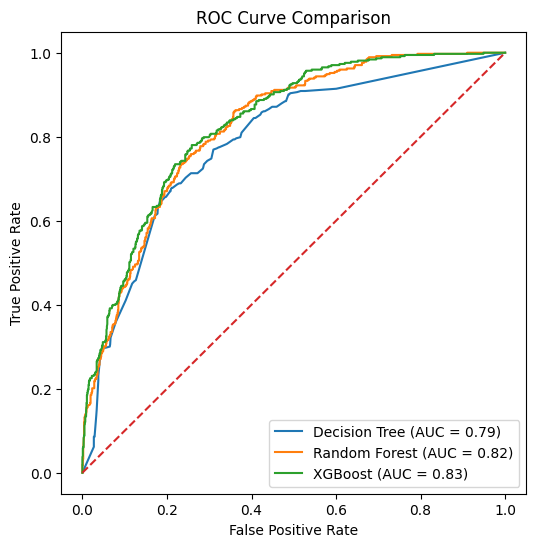

In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Decision Tree": rs_dt_estimator,
    "Random Forest": rs_rfc_estimator,
    "XGBoost": xgb_estimator
}

plt.figure(figsize=(6, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    model_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [107]:
def plot_roc_curve(model, X_test, y_test, model_name="Model"):
    
    # Get probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC values
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], linestyle='--')
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()
    
    print(f"{model_name} AUC Score: {roc_auc:.4f}")

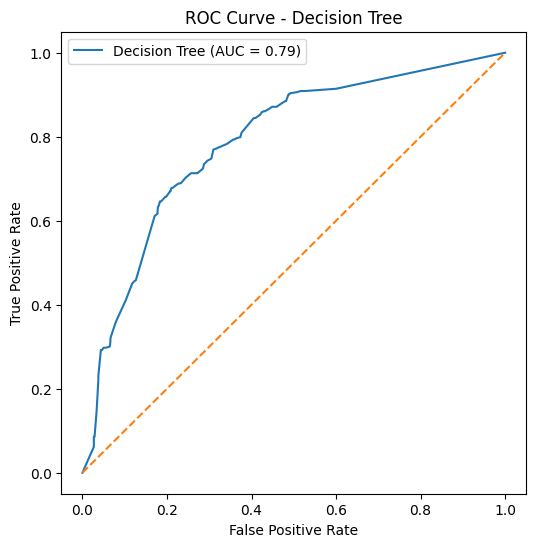

Decision Tree AUC Score: 0.7873


In [108]:
plot_roc_curve(rs_dt_estimator, X_test, Y_test, "Decision Tree")

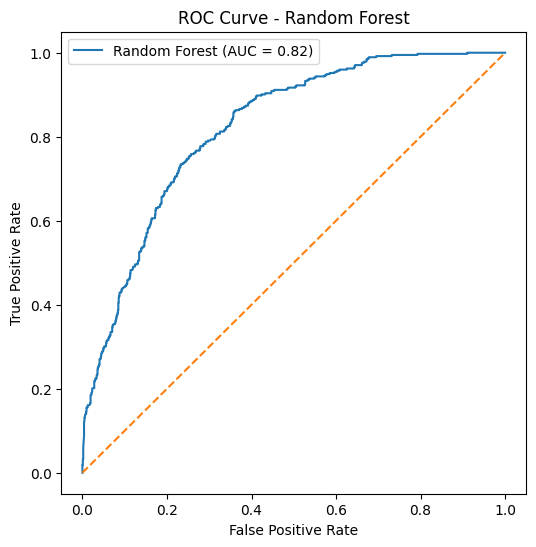

Random Forest AUC Score: 0.8225


In [109]:
plot_roc_curve(rs_rfc_estimator, X_test, Y_test, "Random Forest")

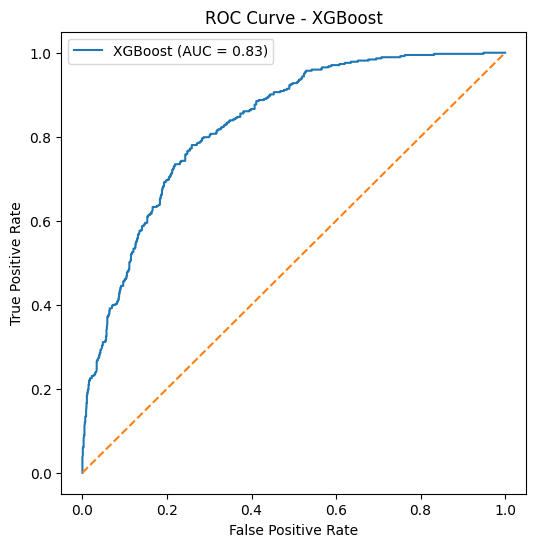

XGBoost AUC Score: 0.8310


In [110]:
plot_roc_curve(xgb_estimator, X_test, Y_test, "XGBoost")

Evaluation

In [118]:
Y_test_pred_decision_tree = rs_dt_estimator.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_test_pred_decision_tree)
conf_matrix = confusion_matrix(Y_test, Y_test_pred_decision_tree)
classification_rep = classification_report(Y_test, Y_test_pred_decision_tree)

print("Accuracy score of Decision tree\n", accuracy_dt)
print("Confusion matrix Decision tree\n", conf_matrix)
print("Classification report Decision tree\n", classification_rep)

Accuracy score of Decision tree
 0.7466288147622427
Confusion matrix Decision tree
 [[795 241]
 [116 257]]
Classification report Decision tree
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1036
           1       0.52      0.69      0.59       373

    accuracy                           0.75      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.75      0.76      1409



In [115]:
Y_test_pred_rfc = rs_rfc_estimator.predict(X_test)
accuracy_rfc = accuracy_score(Y_test, Y_test_pred_rfc)
conf_matrix = confusion_matrix(Y_test, Y_test_pred_rfc)
classification_rep = classification_report(Y_test, Y_test_pred_rfc)

print("Accuracy score of Random Forest Classifier\n", accuracy_rfc)
print("Confusion matrix Random Forest Classifier\n", conf_matrix)
print("Classification Random Forest Classifier\n", classification_rep)

Accuracy score of Random Forest Classifier
 0.7686302342086586
Confusion matrix Random Forest Classifier
 [[845 191]
 [135 238]]
Classification Random Forest Classifier
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.55      0.64      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [116]:
Y_test_pred_xgb = xgb_estimator.predict(X_test)
accuracy_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
conf_matrix = confusion_matrix(Y_test, Y_test_pred_xgb)
classification_rep = classification_report(Y_test, Y_test_pred_xgb)

print("Accuracy score of XGBoost Classifier\n", accuracy_xgb)
print("Confusion matrix XGBoost Classifier\n", conf_matrix)
print("Classification XGBoost Classifier\n", classification_rep)

Accuracy score of XGBoost Classifier
 0.7686302342086586
Confusion matrix XGBoost Classifier
 [[820 216]
 [110 263]]
Classification XGBoost Classifier
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [130]:
# Decision Tree
dt_model = rs_dt_estimator
y_pred_dt = dt_model.predict(X_test)

prec_dt = precision_score(Y_test, y_pred_dt)
rec_dt = recall_score(Y_test, y_pred_dt)
f1_dt = f1_score(Y_test, y_pred_dt)


# Random Forest
rf_model = rs_rfc_estimator
y_pred_rf = rf_model.predict(X_test)

prec_rfc = precision_score(Y_test, y_pred_rf)
rec_rfc = recall_score(Y_test, y_pred_rf)
f1_rfc = f1_score(Y_test, y_pred_rf)


# XGBoost
xgb_model = xgb_estimator
y_pred_xgb = xgb_model.predict(X_test)

prec_xgb = precision_score(Y_test, y_pred_xgb)
rec_xgb = recall_score(Y_test, y_pred_xgb)
f1_xgb = f1_score(Y_test, y_pred_xgb)

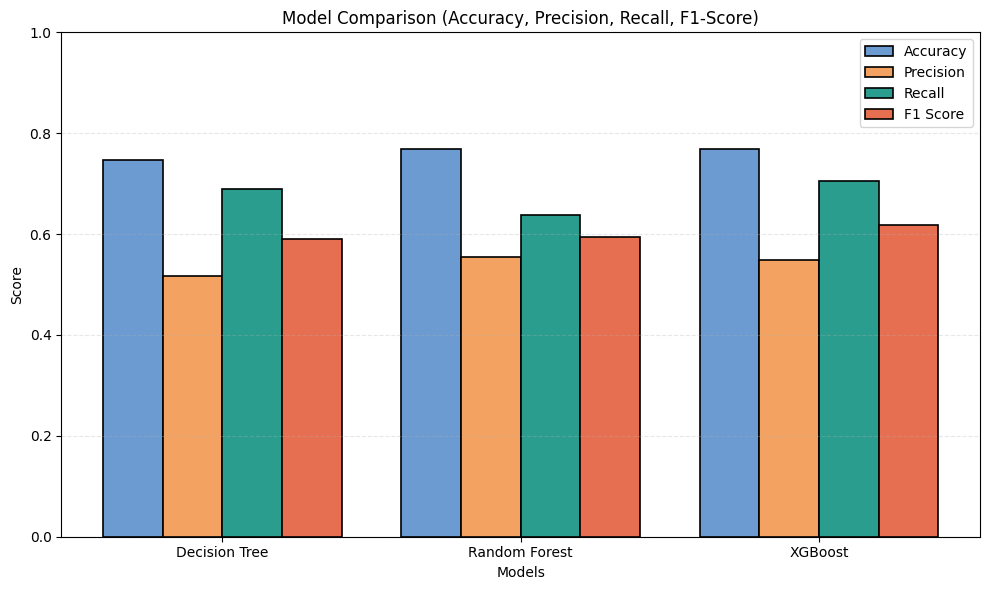

In [138]:
models = ["Decision Tree", "Random Forest", "XGBoost"]

accuracy = [accuracy_dt, accuracy_rfc, accuracy_xgb]
precision = [prec_dt, prec_rfc, prec_xgb]
recall = [rec_dt, rec_rfc, rec_xgb]
f1 = [f1_dt, f1_rfc, f1_xgb]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))

colors = ["#6C9BD2", "#F4A261", "#2A9D8F", "#E76F51"]

plt.bar(x - 1.5*width, accuracy, width, 
        label="Accuracy", color=colors[0],
        edgecolor="black", linewidth=1.2)

plt.bar(x - 0.5*width, precision, width, 
        label="Precision", color=colors[1],
        edgecolor="black", linewidth=1.2)

plt.bar(x + 0.5*width, recall, width, 
        label="Recall", color=colors[2],
        edgecolor="black", linewidth=1.2)

plt.bar(x + 1.5*width, f1, width, 
        label="F1 Score", color=colors[3],
        edgecolor="black", linewidth=1.2)

plt.xticks(x, models)
plt.ylim(0,1)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison (Accuracy, Precision, Recall, F1-Score)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
Y_test_pred = best_model.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_test_pred)
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
classification_rep = classification_report(Y_test, Y_test_pred)

In [ ]:
print("Accuracy score of best model\n", accuracy_dt)
print("Confusion matrix of best model\n", conf_matrix)
print("Classification report of best model\n", classification_rep)

Accuracy score of best model
 0.7686302342086586
Confusion matrix of best model
 [[820 216]
 [110 263]]
Classification report of best model
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [ ]:
# Predictive System
input = (0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85)

input_arr = np.asarray(input)

reshaped_input = input_arr.reshape(1, -1)

prediction = best_model.predict(reshaped_input)

if prediction[0] == 0:
    print("No")
else:
    print("Yes")